In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os

In [24]:
dataset = pd.read_csv('Churn_Modelling.csv')
print("Initial Dataset Info:")
print(dataset.info())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [25]:
x = dataset.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = dataset['Exited']

In [26]:
imputer = SimpleImputer(strategy='mean')
x_imputed = pd.DataFrame(imputer.fit_transform(x.select_dtypes(include=[np.number])), columns=x.select_dtypes(include=[np.number]).columns)


categorical_cols = x.select_dtypes(include=['object'])
x = pd.concat([x_imputed, categorical_cols.reset_index(drop=True)], axis=1)

In [27]:
x = pd.get_dummies(x, columns=['Geography', 'Gender'], drop_first=True)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [31]:
y_pred = model.predict(x_test_scaled)

In [32]:
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(f'Precision: {precision_score(y_test, y_pred) * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 84.04%
Precision: 88.73%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1991
           1       0.89      0.25      0.39       509

    accuracy                           0.84      2500
   macro avg       0.86      0.62      0.65      2500
weighted avg       0.85      0.84      0.80      2500



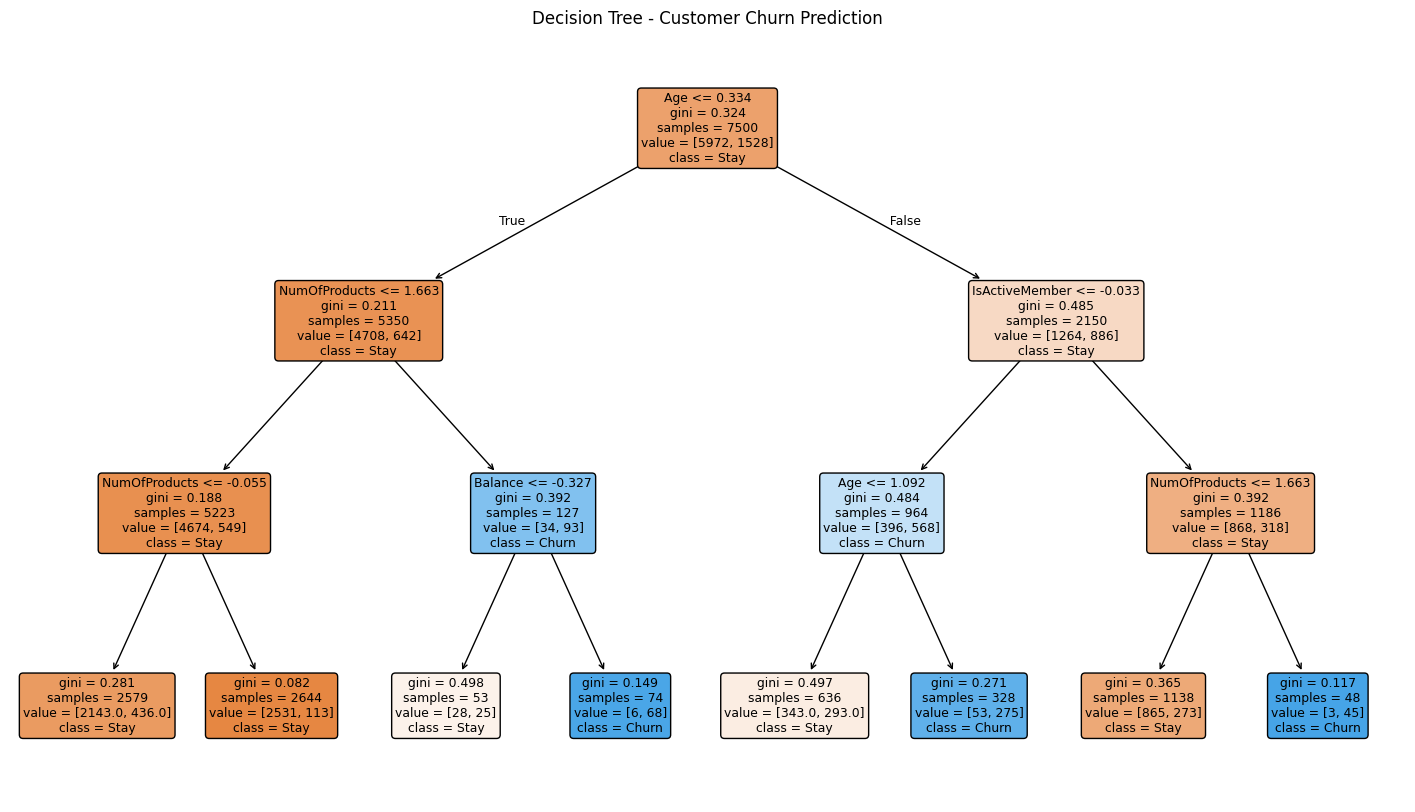

In [33]:
plt.figure(figsize=(18, 10))
plot_tree(model, feature_names=x.columns, class_names=['Stay', 'Churn'], filled=True, rounded=True)
plt.title("Decision Tree - Customer Churn Prediction")
plt.show()